In [12]:
import pyes
import json


host = '219.84.19.102:9200'
# host = '192.168.1.3:9200'


fid1 = '180080052032125'
#光泉
fid2 = '152341009257'
#全家


In [13]:
# 總共有多少comment
def totalcomment(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    tagg = pyes.aggs.TermsAgg('fidcomment', field= 'fid')
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(tagg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
#     print json.dumps(result.aggs,indent=2) 
    for fidpid_summary in result.aggs["fidcomment"]["buckets"]:
        return fidpid_summary["doc_count"]

print totalcomment(fid1)#光泉
print totalcomment(fid2)#全家

26694
1025050


In [33]:
# 總共有多少post
def totalpost(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    tagg = pyes.aggs.TermsAgg('fidpost', field= 'fid')
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(tagg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='post')
    for fidpid_summary in result.aggs["fidpost"]["buckets"]:
         return fidpid_summary["doc_count"]
        
print totalpost(fid1)#光泉
print totalpost(fid2)#全家

106
1106


In [38]:
# 總共有多少like
def totallikes(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    tagg = pyes.aggs.TermsAgg('fidlike', field= 'fid')
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(tagg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='like')
    for fidpid_summary in result.aggs["fidlike"]["buckets"]:
         return fidpid_summary["doc_count"]
        
print totallikes(fid1)#光泉
print totallikes(fid2)#全家

161843
2591853


In [39]:
allTwitter=[]
# tempjson = {}
# tempjson['abbr'] ='post' 
# tempjson['光泉'] = totalpost(fid1)
# tempjson['全家'] = totalpost(fid2)
# allTwitter.append(tempjson) 
# tempjson = {}
# tempjson['abbr'] ='comment' 
# tempjson['光泉'] = totalcomment(fid1)
# tempjson['全家'] = totalcomment(fid2)
tempjson = {}
tempjson['abbr'] ='like' 
tempjson['光泉'] = totallikes(fid1)
tempjson['全家'] = totallikes(fid2)
allTwitter.append(tempjson)    
from bokeh.charts import Bar, output_file, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.charts.utils import df_from_json
from bokeh.io import output_notebook

# utilize utility to make it easy to get json/dict data converted to a dataframe
df = df_from_json(allTwitter)
df
bar = Bar(df,
          values=blend('光泉', '全家', name='medals', labels_name='medal'),
          label=cat(columns='abbr', sort=False),
          stack=cat(columns='medal', sort=False),
          color=color(columns='medal', palette=['SaddleBrown', 'Silver'],
                      sort=False),
          legend='top_right',
          title="長條圖")
# output_notebook()
output_file("Twitter_bar.html", title="stacked_bar.py example")

show(bar)

INFO:bokeh.core.state:Session output file 'Twitter_bar.html' already exists, will be overwritten.


In [59]:
%matplotlib inline



def boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter):
    data=[]
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
        #print json.dumps(result.aggs,indent=2) 
        for fidpid_summary in result.aggs["pid"]["buckets"]:
#             print fidpid_summary["key"] + ',' + str(fidpid_summary["doc_count"])
            if fidpid_summary["doc_count"] < outlierFilter or outlierFilter < 0:
                data.append([fidpid_summary["doc_count"],fid,fidpid_summary["key"]])

    df=pd.DataFrame(data,columns={'count','fid','fidpid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="fid", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    fig.savefig(pngFilePath)

In [63]:
def boxPlotFBFansPageLikep(fids,host,pngFilePath,outlierFilter):
    data=[]
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='like')
        #print json.dumps(result.aggs,indent=2) 
        for fidpid_summary in result.aggs["pid"]["buckets"]:
#             print fidpid_summary["key"] + ',' + str(fidpid_summary["doc_count"])
            if fidpid_summary["doc_count"] < outlierFilter or outlierFilter < 0:
                data.append([fidpid_summary["doc_count"],fid,fidpid_summary["key"]])

    df=pd.DataFrame(data,columns={'count','fid','fidpid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="fid", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    fig.savefig(pngFilePath)

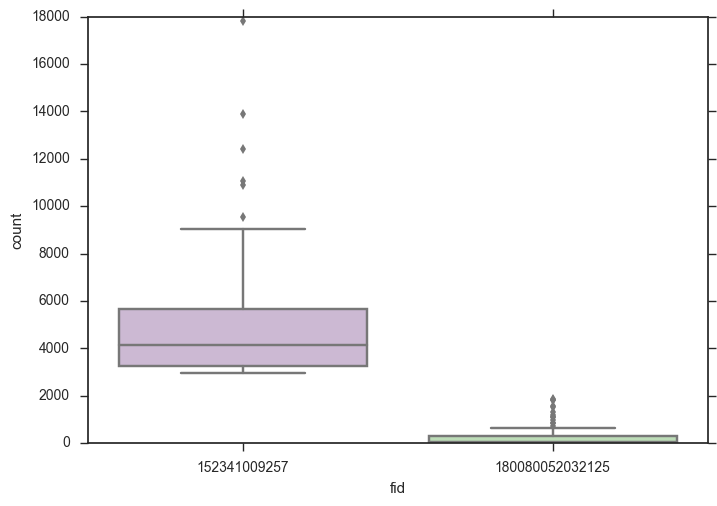

In [62]:
#assign the facebook fans page that you prefered
fids=[fid1,fid2]

#output box plot PNG figure
pngFilePath="output.png"

#outlier threshold you want to filter (if you give minus ONE, none of outlier is filtered.)
outlierFilter=20000

#obtain the result and save as "pngFilePath" given from you
boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter)

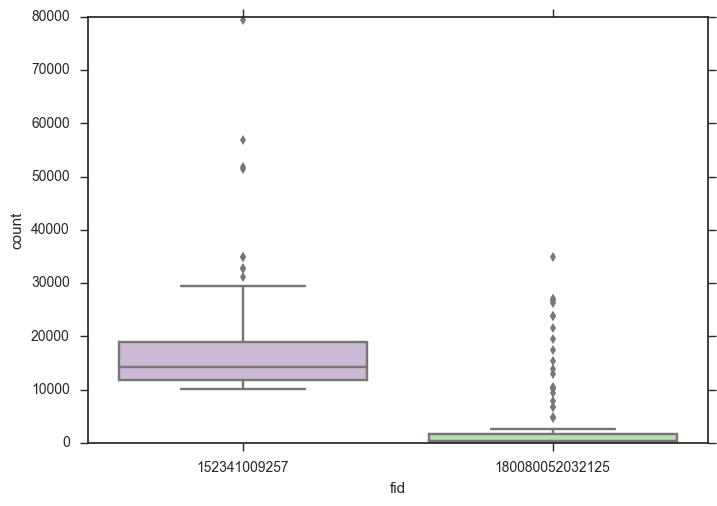

In [66]:
#assign the facebook fans page that you prefered
fids=[fid1,fid2]

#output box plot PNG figure
pngFilePath="output.png"

#outlier threshold you want to filter (if you give minus ONE, none of outlier is filtered.)
outlierFilter=100000

#obtain the result and save as "pngFilePath" given from you
boxPlotFBFansPageLikep(fids,host,pngFilePath,outlierFilter)

In [14]:
import datetime
import matplotlib.pyplot as plt

def boxPlotNumofPostPerMonth(fid,host,lowerbound,upperbound,pngFilePath):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')

    data=[]
    for r in result.aggs["month"]["buckets"]:
        for pid in r["pid"]["buckets"]:
            monthyear=datetime.datetime.strptime(r["key_as_string"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y/%m')
            data.append([pid["doc_count"],monthyear,pid["key"],r["key"]])

    df=pd.DataFrame(data,columns={'date','count','fid','pid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="date", y="count",width = 1, data=df, palette="PRGn")
    fig=sns_plot.get_figure()
#     plt.xlim(1,30)
    plt.ylim(lower_bound, upper_bound)
    fig.savefig(pngFilePath)

In [15]:
lower_bound = 0
upper_bound = 500
pngFilePath="output3.png"
boxPlotNumofPostPerMonth(fid1,host,lower_bound,upper_bound,pngFilePath)

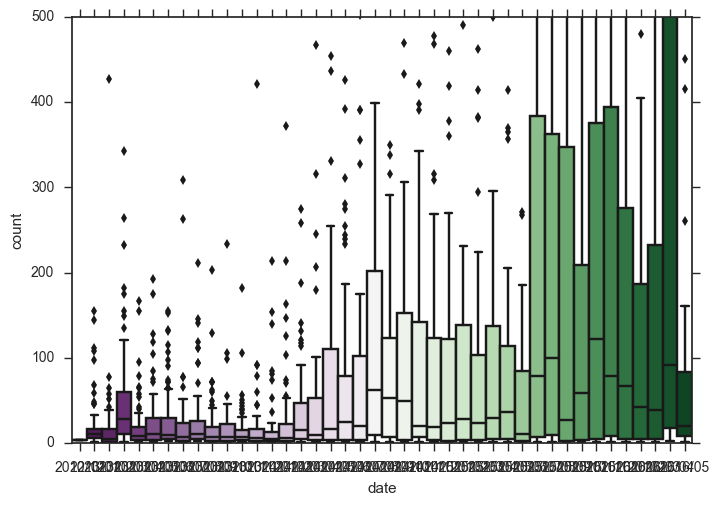

In [142]:
lower_bound = 0
upper_bound = 500
pngFilePath="output4.png"
boxPlotNumofPostPerMonth(fid2,host,lower_bound,upper_bound,pngFilePath)